In [2]:
import os
import shutil
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
base_dir = 'C:\\Users\\miga1\\programowanie\\handwriting\\siec\\dane4'

(74, 109)
1.0


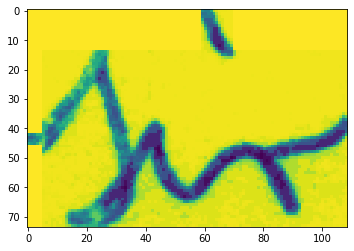

In [10]:
example = base_dir+'\\a01'+'\\a01-014-00-00.png'
example_img = imread(example)
plt.imshow(example_img)
#plt.title('Przykładowy obraz')
print(example_img.shape)
print(example_img.max())

In [5]:
dim1 = []
dim2 = []

for autor in os.listdir(base_dir):
    for image_filename in os.listdir(base_dir+'\\'+autor):

        img = imread(base_dir+'\\'+autor+'\\'+image_filename)
        d1,d2 = img.shape
        dim1.append(d1)
        dim2.append(d2)

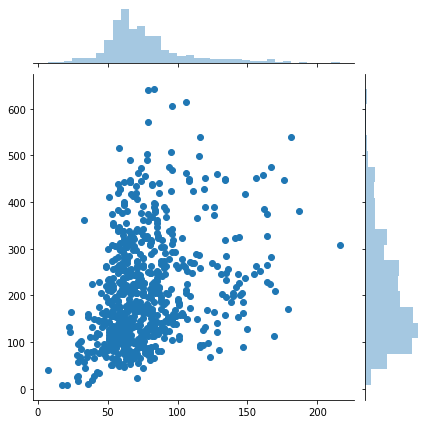

In [12]:
sns.jointplot(dim1,dim2)
#plt.suptitle('Wymiary obrazów')

In [13]:
print(np.mean(dim1))
print(np.mean(dim2))

75.92112676056338
206.44788732394366


In [15]:
img_shape = (76,208,1)

In [16]:
data_dir = './images'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

train_autor1_dir = os.path.join(train_dir, 'a01')
train_autor2_dir = os.path.join(train_dir, 'a02')
train_autor3_dir = os.path.join(train_dir, 'a03')
train_autor4_dir = os.path.join(train_dir, 'a04')
train_autor5_dir = os.path.join(train_dir, 'a05')
train_autor6_dir = os.path.join(train_dir, 'a06')
train_autor7_dir = os.path.join(train_dir, 'a07')
train_autor8_dir = os.path.join(train_dir, 'a08')
train_autor9_dir = os.path.join(train_dir, 'a09')
train_autor10_dir = os.path.join(train_dir, 'a10')

test_autor1_dir = os.path.join(test_dir, 'a01')
test_autor2_dir = os.path.join(test_dir, 'a02')
test_autor3_dir = os.path.join(test_dir, 'a03')
test_autor4_dir = os.path.join(test_dir, 'a04')
test_autor5_dir = os.path.join(test_dir, 'a05')
test_autor6_dir = os.path.join(test_dir, 'a06')
test_autor7_dir = os.path.join(test_dir, 'a07')
test_autor8_dir = os.path.join(test_dir, 'a08')
test_autor9_dir = os.path.join(test_dir, 'a09')
test_autor10_dir = os.path.join(test_dir, 'a10')

for directory in (train_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_autor1_dir, train_autor2_dir, train_autor3_dir, train_autor4_dir, train_autor5_dir, train_autor6_dir, train_autor7_dir, train_autor8_dir, train_autor9_dir, train_autor10_dir, test_autor1_dir, test_autor2_dir, test_autor3_dir, test_autor4_dir, test_autor5_dir, test_autor6_dir, test_autor7_dir, test_autor8_dir, test_autor9_dir, test_autor10_dir,]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir) 

In [17]:
autor1_fnames = os.listdir(os.path.join(base_dir, 'a01'))
autor2_fnames = os.listdir(os.path.join(base_dir, 'a02'))
autor3_fnames = os.listdir(os.path.join(base_dir, 'a03'))
autor4_fnames = os.listdir(os.path.join(base_dir, 'a04'))
autor5_fnames = os.listdir(os.path.join(base_dir, 'a05'))
autor6_fnames = os.listdir(os.path.join(base_dir, 'a06'))
autor7_fnames = os.listdir(os.path.join(base_dir, 'a07'))
autor8_fnames = os.listdir(os.path.join(base_dir, 'a08'))
autor9_fnames = os.listdir(os.path.join(base_dir, 'a09'))
autor10_fnames = os.listdir(os.path.join(base_dir, 'a10'))

autor1_fnames = [fname for fname in autor1_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor2_fnames = [fname for fname in autor2_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor3_fnames = [fname for fname in autor3_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor4_fnames = [fname for fname in autor4_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor5_fnames = [fname for fname in autor5_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor6_fnames = [fname for fname in autor6_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor7_fnames = [fname for fname in autor7_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor8_fnames = [fname for fname in autor8_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor9_fnames = [fname for fname in autor9_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
autor10_fnames = [fname for fname in autor10_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

In [18]:
size = 71

train_size = int(np.floor(0.7 * size))
test_size = size - train_size

train_idx = train_size
test_idx = train_size + test_size

In [19]:
for i, fname in enumerate(autor1_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a01', fname)
        dst = os.path.join(train_autor1_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a01', fname)
        dst = os.path.join(test_autor1_dir, fname)
        shutil.copyfile(src, dst)

for i, fname in enumerate(autor2_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a02', fname)
        dst = os.path.join(train_autor2_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a02', fname)
        dst = os.path.join(test_autor2_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor3_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a03', fname)
        dst = os.path.join(train_autor3_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a03', fname)
        dst = os.path.join(test_autor3_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor4_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a04', fname)
        dst = os.path.join(train_autor4_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a04', fname)
        dst = os.path.join(test_autor4_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor5_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a05', fname)
        dst = os.path.join(train_autor5_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a05', fname)
        dst = os.path.join(test_autor5_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor6_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a06', fname)
        dst = os.path.join(train_autor6_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a06', fname)
        dst = os.path.join(test_autor6_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor7_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a07', fname)
        dst = os.path.join(train_autor7_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a07', fname)
        dst = os.path.join(test_autor7_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor8_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a08', fname)
        dst = os.path.join(train_autor8_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a08', fname)
        dst = os.path.join(test_autor8_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor9_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a09', fname)
        dst = os.path.join(train_autor9_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a09', fname)
        dst = os.path.join(test_autor9_dir, fname)
        shutil.copyfile(src, dst)
        
for i, fname in enumerate(autor10_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'a10', fname)
        dst = os.path.join(train_autor10_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i < test_idx:
        src = os.path.join(base_dir, 'a10', fname)
        dst = os.path.join(test_autor10_dir, fname)
        shutil.copyfile(src, dst) 

print('autor1 - zbiór treningowy', len(os.listdir(train_autor1_dir)))
print('autor1 - zbiór testowy', len(os.listdir(test_autor1_dir)))

print('autor2 - zbiór treningowy', len(os.listdir(train_autor2_dir)))
print('autor2 - zbiór testowy', len(os.listdir(test_autor2_dir)))

print('autor3 - zbiór treningowy', len(os.listdir(train_autor3_dir)))
print('autor3 - zbiór testowy', len(os.listdir(test_autor3_dir)))

print('autor4 - zbiór treningowy', len(os.listdir(train_autor4_dir)))
print('autor4 - zbiór testowy', len(os.listdir(test_autor4_dir)))

print('autor5 - zbiór treningowy', len(os.listdir(train_autor5_dir)))
print('autor5 - zbiór testowy', len(os.listdir(test_autor5_dir)))

print('autor6 - zbiór treningowy', len(os.listdir(train_autor6_dir)))
print('autor6 - zbiór testowy', len(os.listdir(test_autor6_dir)))

print('autor7 - zbiór treningowy', len(os.listdir(train_autor7_dir)))
print('autor7 - zbiór testowy', len(os.listdir(test_autor7_dir)))

print('autor8 - zbiór treningowy', len(os.listdir(train_autor8_dir)))
print('autor8 - zbiór testowy', len(os.listdir(test_autor8_dir)))

print('autor9 - zbiór treningowy', len(os.listdir(train_autor9_dir)))
print('autor9 - zbiór testowy', len(os.listdir(test_autor9_dir)))

print('autor10 - zbiór treningowy', len(os.listdir(train_autor10_dir)))
print('autor10 - zbiór testowy', len(os.listdir(test_autor10_dir)))

autor1 - zbiór treningowy 50
autor1 - zbiór testowy 21
autor2 - zbiór treningowy 50
autor2 - zbiór testowy 21
autor3 - zbiór treningowy 50
autor3 - zbiór testowy 22
autor4 - zbiór treningowy 52
autor4 - zbiór testowy 23
autor5 - zbiór treningowy 53
autor5 - zbiór testowy 25
autor6 - zbiór treningowy 50
autor6 - zbiór testowy 21
autor7 - zbiór treningowy 50
autor7 - zbiór testowy 21
autor8 - zbiór treningowy 50
autor8 - zbiór testowy 21
autor9 - zbiór treningowy 51
autor9 - zbiór testowy 22
autor10 - zbiór treningowy 50
autor10 - zbiór testowy 23


In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
)

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=img_shape[:2],
                                                   batch_size=8,
                                                   class_mode='categorical')

test_generator = train_datagen.flow_from_directory(directory=test_dir,
                                                   target_size=img_shape[:2],
                                                   batch_size=8,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 506 images belonging to 10 classes.
Found 220 images belonging to 10 classes.


In [23]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 74, 206, 16)       160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 103, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 101, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 24, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10752)            

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
results = model.fit_generator(train_generator,epochs=20,
                             validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 64 steps, validate for 28 steps
Epoch 1/20
 1/64 [..............................] - ETA: 3:45

UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node sequential_1/conv2d_3/Relu (defined at <ipython-input-28-b1f43d3547d2>:2) ]] [Op:__inference_distributed_function_1201]

Function call stack:
distributed_function
